# 使用 sklearn 转换器处理数据
- sklearn 的 dataset 继承了经典数据集
- 提供统一接口——转换器（Transformer）

In [5]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [7]:
cancer['data'].shape

(569, 30)

In [8]:
cancer['target'].shape

(569,)

In [9]:
print(cancer['filename'])

breast_cancer.csv


## 鸢尾花数据集

In [13]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())
print(iris['data'].shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(150, 4)


## 数据集拆分
数据集划分为 **训练集** 和 **验证集** 以及 **测试集**

model_selection 中的 train_test_split 函数
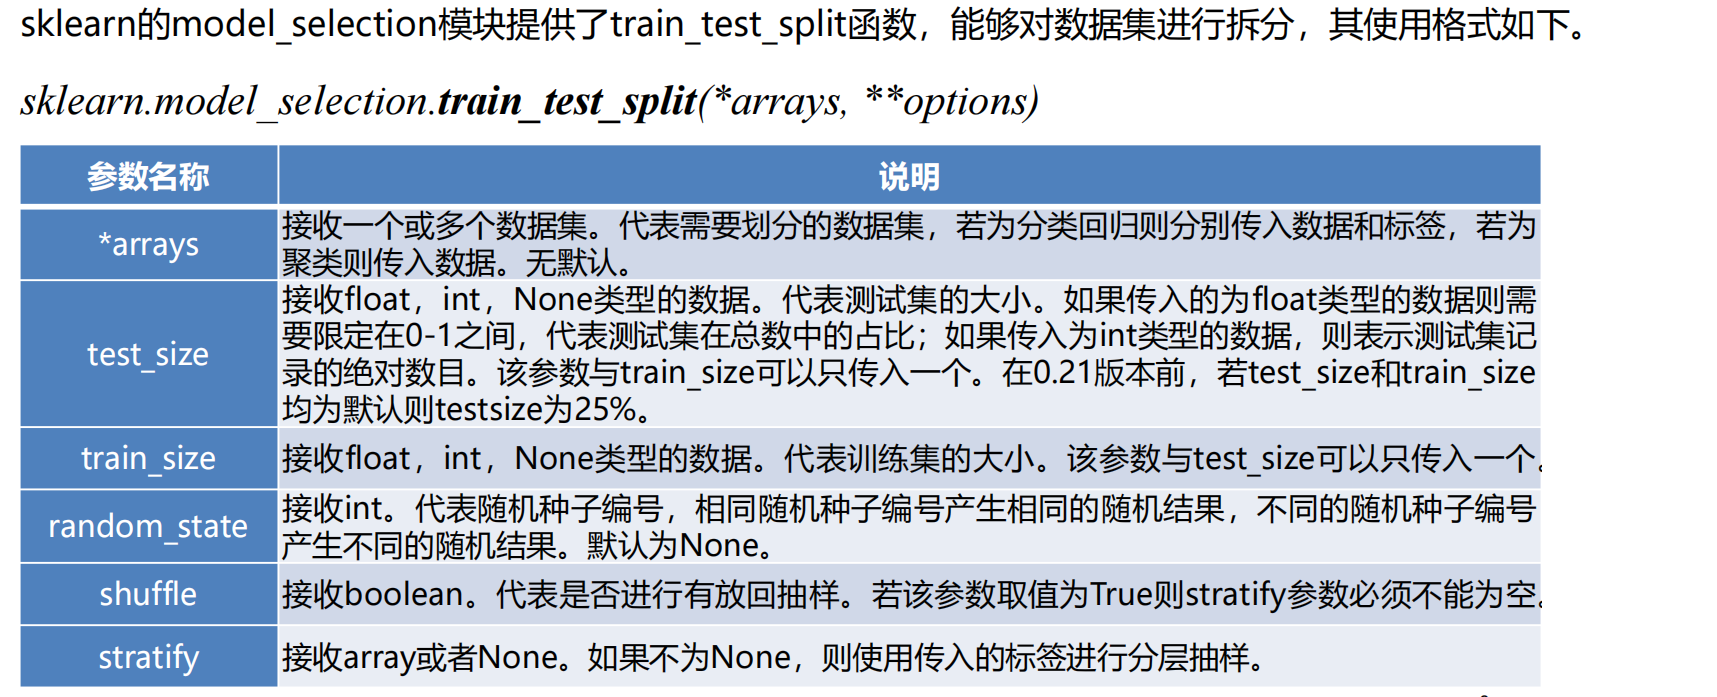

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd # 查看数据是否为随机抽取的
iris = load_iris()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2)
print(X_train.shape)
pd.Series(y_train).value_counts() # 表明随机抽取的

(120, 4)


0    42
2    41
1    37
Name: count, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size=0.2, stratify=iris['target'])
print(X_train.shape)
pd.Series(y_train).value_counts() # 分层进行抽样（iris 的每个 target 抽取相同个数）

(120, 4)


1    40
0    40
2    40
Name: count, dtype: int64

## 使用 transformer 将数据进行标准化等处理
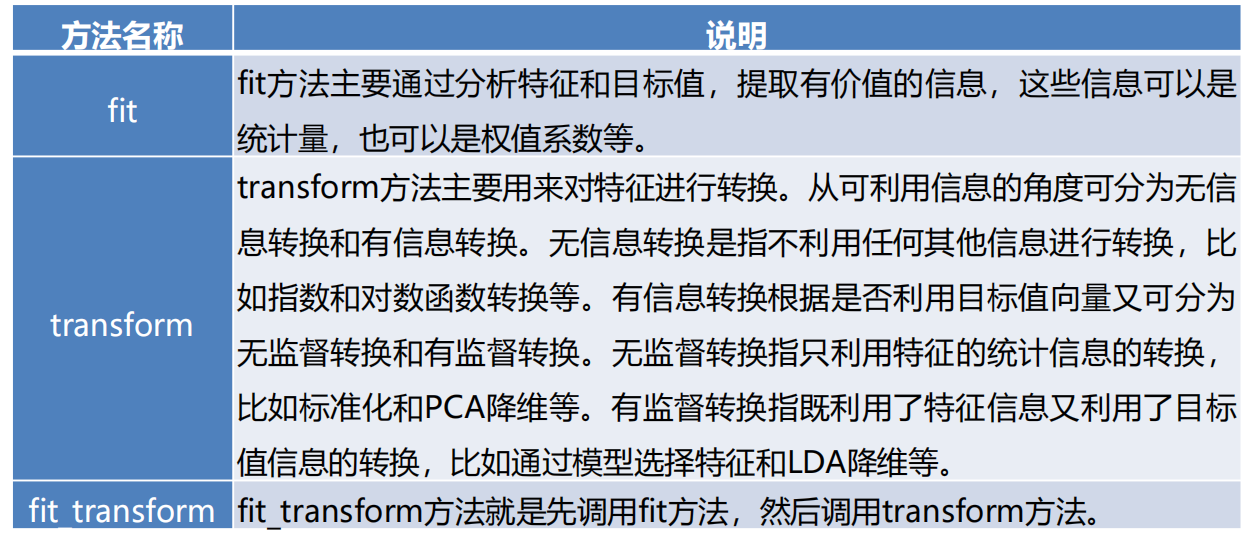

In [31]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
# iris['data']

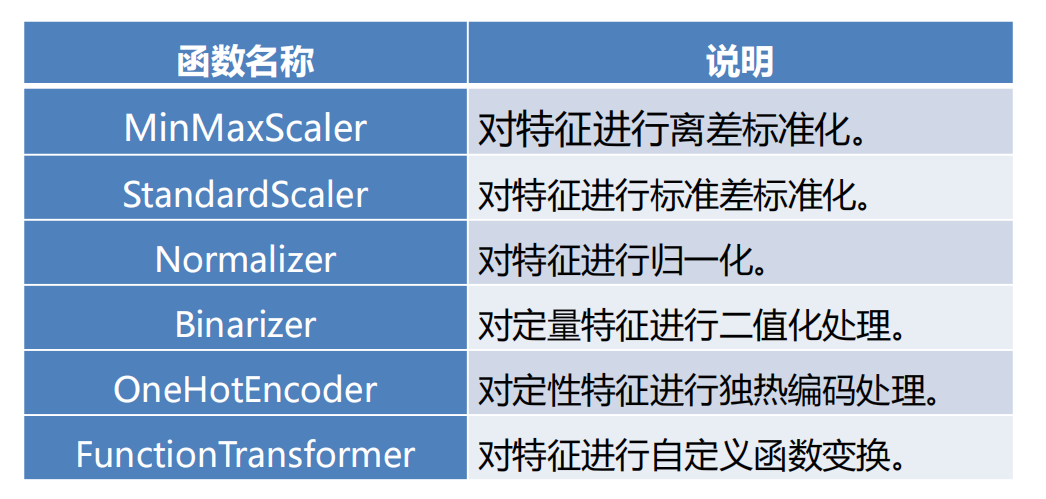

In [29]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_train) # 生成转换器
min_max_scaler.transform(X_train) # 进行转换操作
print('ok to transform X_train')

ok to transform X_train


In [30]:
MinMaxScaler().fit_transform(X_test)

array([[0.18181818, 0.625     , 0.03508772, 0.        ],
       [0.57575758, 0.3125    , 0.68421053, 0.76190476],
       [0.48484848, 0.        , 0.52631579, 0.38095238],
       [0.15151515, 0.125     , 0.40350877, 0.38095238],
       [0.6969697 , 0.5       , 0.73684211, 1.        ],
       [0.6969697 , 0.5625    , 0.59649123, 0.57142857],
       [0.6969697 , 0.6875    , 0.8245614 , 0.9047619 ],
       [0.42424242, 0.3125    , 0.71929825, 0.80952381],
       [0.06060606, 0.625     , 0.07017544, 0.        ],
       [0.75757576, 0.625     , 0.8245614 , 1.        ],
       [0.57575758, 0.6875    , 0.64912281, 0.66666667],
       [0.18181818, 0.75      , 0.0877193 , 0.        ],
       [0.60606061, 0.4375    , 0.57894737, 0.52380952],
       [0.75757576, 0.5625    , 0.68421053, 0.61904762],
       [0.06060606, 0.75      , 0.07017544, 0.04761905],
       [0.15151515, 0.5625    , 0.0877193 , 0.        ],
       [0.06060606, 0.875     , 0.        , 0.        ],
       [0.36363636, 0.3125    ,

# 构建并评价聚类模型
- 聚类问题：将不同个体分为相似的子集合 （cluster）
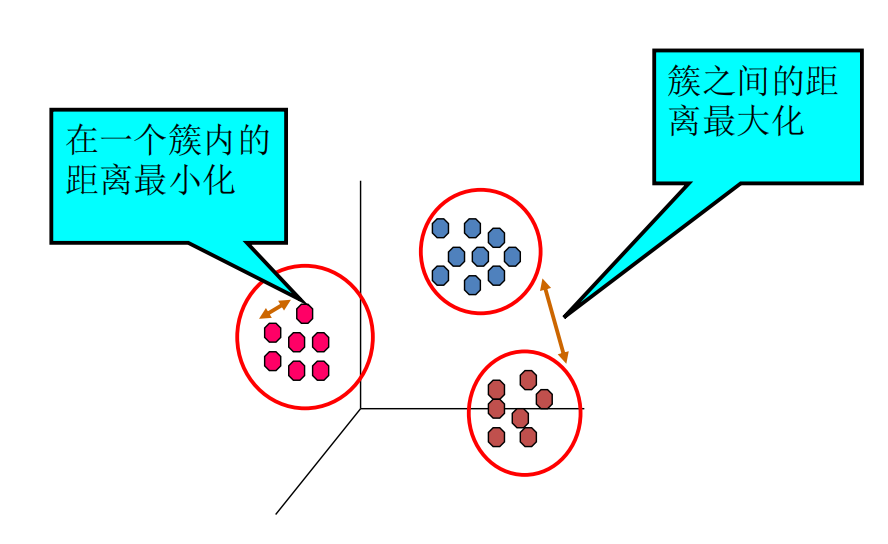

In [37]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

iris = load_iris()

k_means = KMeans(n_clusters=3, n_init=10) # 分为 3 类，执行 K-means 的次数
k_means.fit(iris['data']) # 执行聚类操作

# 查看每类有哪些样本
print(k_means.labels_)
k_means.cluster_centers_

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [36]:
iris['target'] # 原始的样本标签

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## 聚类效果的评价
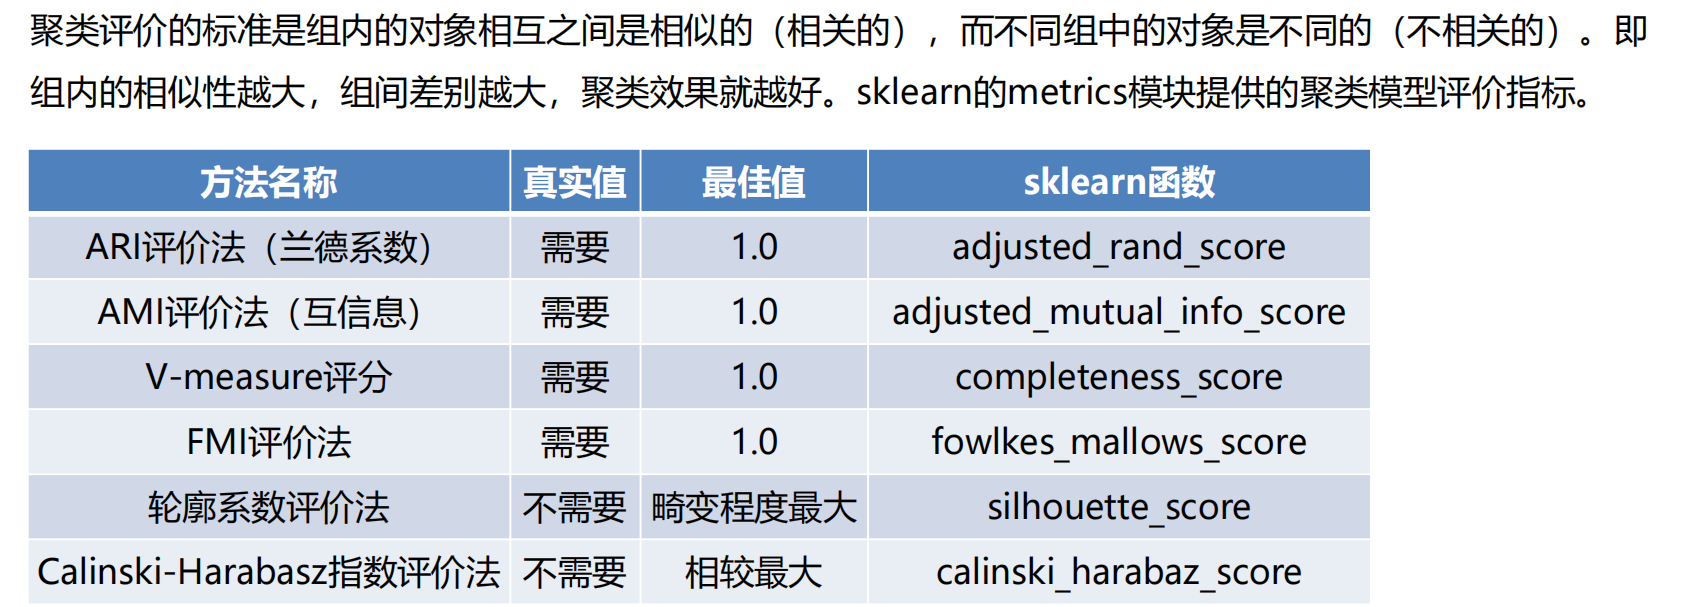

In [39]:
from sklearn.metrics import adjusted_rand_score
# adjusted_rand_score?
adjusted_rand_score(iris['target'], k_means.labels_) # 利用兰德系数对聚类模型进行效果评估

0.7302382722834697

In [46]:
# 对于没有标签时
from sklearn.metrics import silhouette_score
silhouette_score(iris['data'], k_means.labels_)

0.5528190123564094

iris 数据聚 2 类 calinski_harabaz 指数为：513.924546
iris 数据聚 3 类 calinski_harabaz 指数为：561.627757
iris 数据聚 4 类 calinski_harabaz 指数为：530.765808
iris 数据聚 5 类 calinski_harabaz 指数为：495.369906
iris 数据聚 6 类 calinski_harabaz 指数为：473.850607


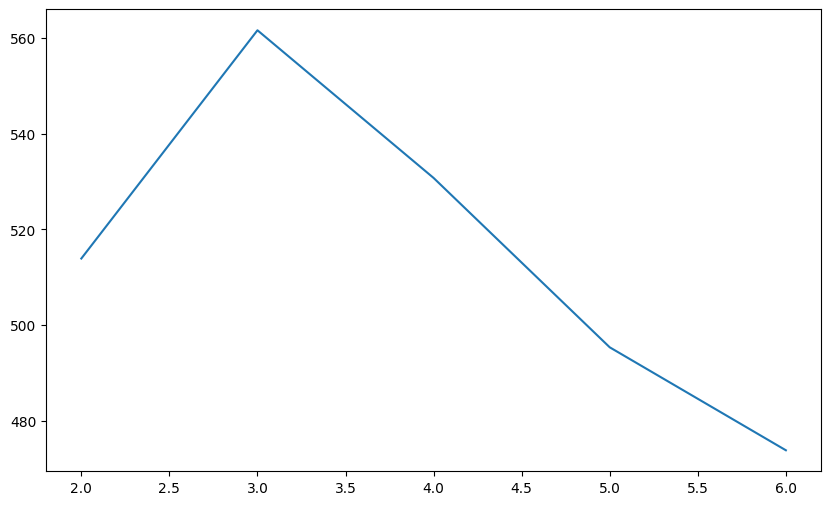

In [54]:
# 通过作图选择优良的训练模型
import matplotlib.pyplot as plt
from sklearn.metrics import calinski_harabasz_score
scores = []
for k in range(2, 7):
#     构建并训练模型
     # 因为需要对比模型，故选取的 random seed 相同
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(iris['data'])
    score = calinski_harabasz_score(iris['data'], kmeans.labels_)
    scores.append(score)
    print('iris 数据聚 %d 类 calinski_harabaz 指数为：%f'%(k, score))

plt.figure(figsize=(10,6))
plt.plot(range(2, 7), scores, linewidth=1.5, linestyle='-')
plt.show() # 注意取值是突变程度最高的最好，如下图中 3

# 构建并评价分类模型
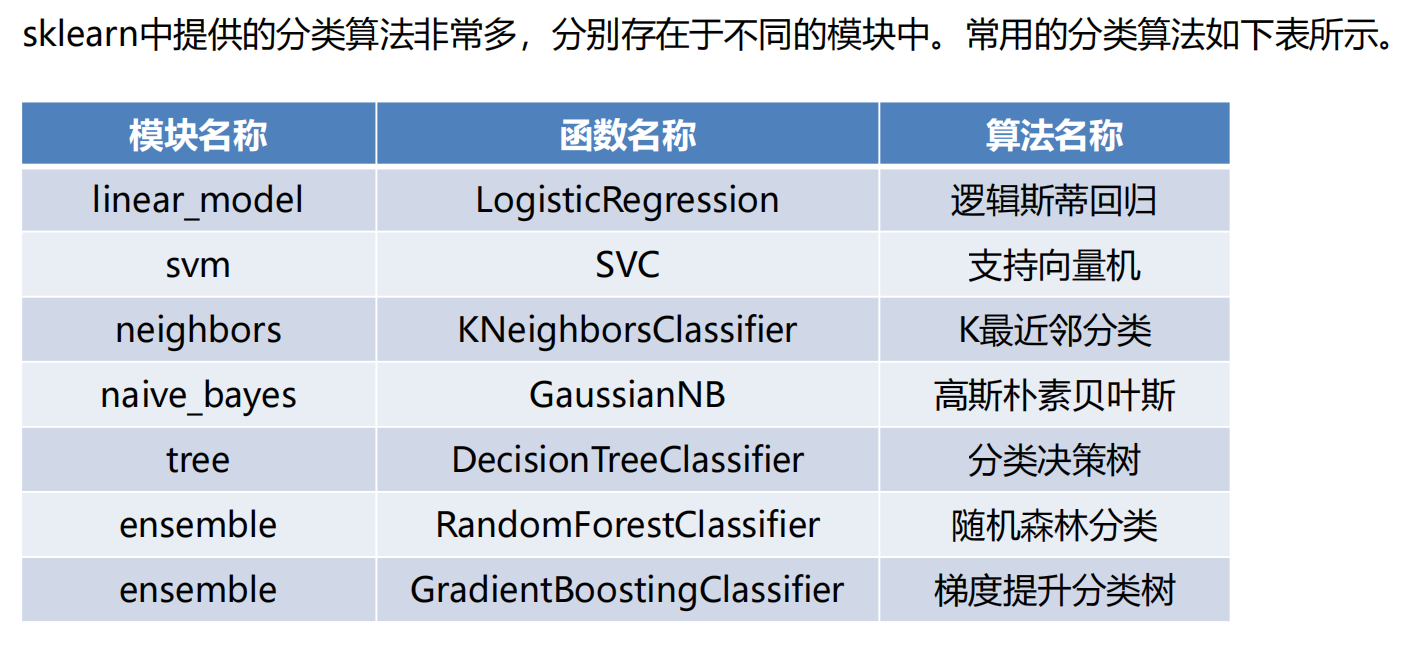

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
iris = load_iris(return_X_y=True) # 只需要 X 和 y
X = iris[0]
y = iris[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)
print(X_train.shape)
print(X_test.shape)

print(pd.Series(y_train).value_counts())

(120, 4)
(30, 4)
2    40
0    40
1    40
Name: count, dtype: int64


In [7]:
clf = DecisionTreeClassifier() # 实例化决策树分类器
clf.fit(X_train, y_train)  # 模型训练

DecisionTreeClassifier()

In [10]:
print(clf.classes_)
print(clf.feature_importances_)

[0 1 2]
[0.         0.01666667 0.54401323 0.43932011]


In [13]:
predicted = clf.predict(X_test) # 利用模型对测试样本标签进行预测
print(predicted)
print(y_test)

# 利用精度展示
(predicted == y_test).mean()

[0 1 1 2 0 0 2 2 0 0 1 0 2 1 1 0 1 1 2 1 2 0 1 1 0 2 0 2 2 1]
[0 1 1 2 0 0 2 2 0 0 1 0 2 2 1 0 1 1 2 1 2 0 1 1 0 2 0 2 2 1]


0.9666666666666667

In [17]:
# 快速评估模型性能
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



# 构建并评估回归模型
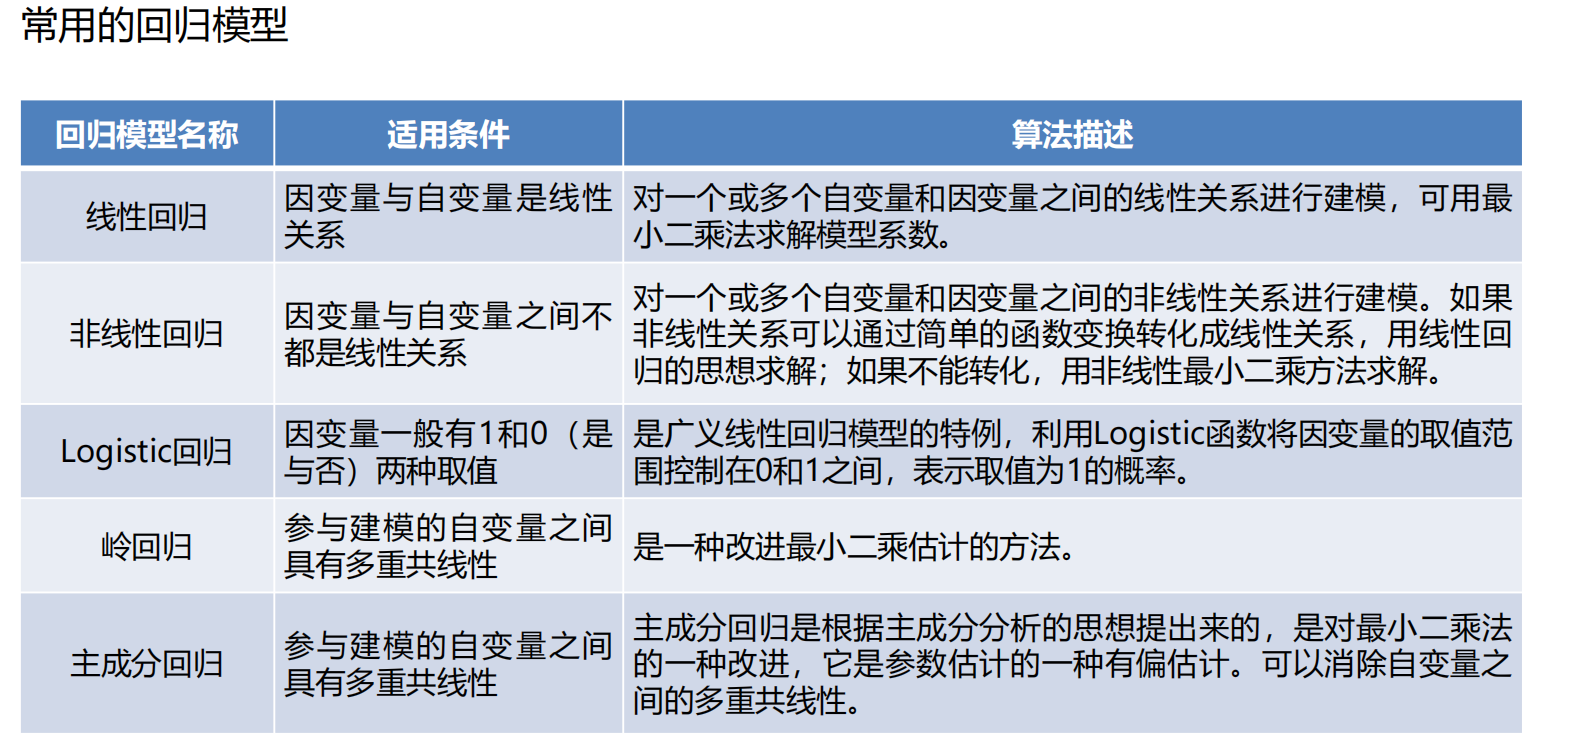
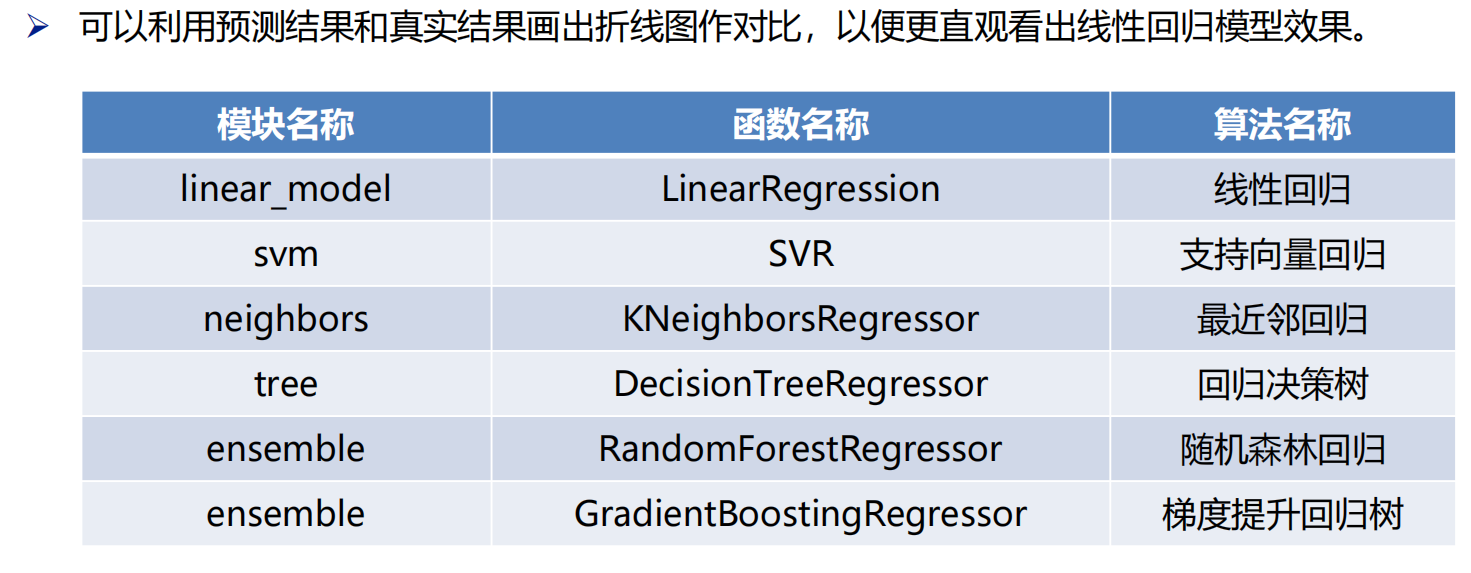

In [1]:
from sklearn.datasets import load_boston

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


In [2]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

print(data.shape)

(506, 13)


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

In [6]:
model = LinearRegression().fit(X_train, y_train) #模型训练
print(model.coef_) # 相关系数
model.intercept_

[-1.13266390e-01  5.36927622e-02  4.03119073e-02  2.38036414e+00
 -2.03525736e+01  3.54244888e+00 -3.84093038e-03 -1.61318513e+00
  3.39913430e-01 -1.39943427e-02 -1.02618731e+00  7.96077389e-03
 -5.16345887e-01]


42.35869835887523

## 评估回归模型

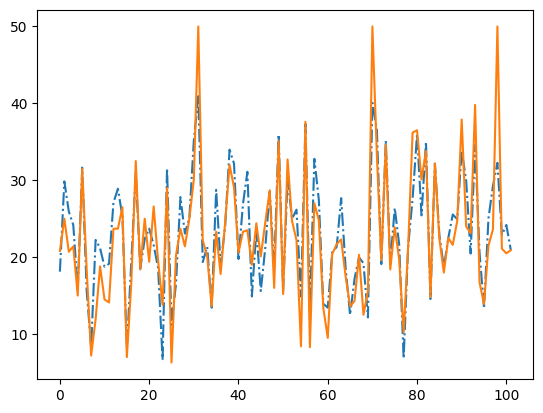

In [11]:
import matplotlib.pyplot as plt
predict = model.predict(X_test)

plt.figure()
plt.plot(range(len(y_test)), predict, '-.')
plt.plot(range(len(y_test)), y_test)
plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predict) # 体现模型性能

16.702163148709648